In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [47]:
import pylab as plt
import numpy as np
import fitsio
import os
import glob
from gastrometry import biweight_median
from sklearn.decomposition import FactorAnalysis
import warnings
from iminuit import Minuit
%matplotlib inline

In [58]:
gm.wrms.reshape(-1)

array([ 7.94273512,  4.84785355,  9.12025245, ..., 10.36355789,
        9.26907294, 13.27005212])

In [68]:
def get_ccd_name(string):
    name = ''
    numbers = [str(j) for j in range(10)]
    stop = 0
    for i in range(len(string)):
        if string[-(i+1)] in numbers:
            name = string[-(i+1)] + name
        if string[-(i+1)] == '_':
            stop += 1
        if stop == 2:
            break
    return int(name)

class linear_fit:
    
    def __init__(self, x, y, x_err, y_err):
        
        x = x.reshape(-1)
        y = y.reshape(-1)
        x_err = x_err.reshape(-1) 
        y_err = y_err.reshape(-1)
        
        Filtre = np.array([True]*len(x))
        for data in [x, y, x_err, y_err]:
            Filtre &= np.isfinite(data)
            Filtre &= (data > 0.)
        
        self.x = x[Filtre]
        self.y = y[Filtre]
        self.x_err = x_err[Filtre]
        self.y_err = y_err[Filtre]
        
    def chi2_fct(self, params):
        residuals = self.y - params[0] * self.x
        var = self.y_err**2 + params[0]**2 * self.x_err**2
        self.chi2 = np.sum(residuals**2 / var)
        return self.chi2
    
    def minimize(self):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            m = Minuit.from_array_func(self.chi2_fct, [1.1], print_level=0)
            m.migrad()
        results = [m.values[key] for key in m.values.keys()]
        self.results = results
    
    def get_slope(self):
        
        self.minimize()
        slope = self.results[0]
        return slope

class get_mean(object):

    def __init__(self, fits_file):

        self.mean = fitsio.read(fits_file)
        self.params0 = self.mean['PARAMS0'][0]
        self.coord0 = self.mean['COORDS0'][0]
        self.wrms0 = self.mean['WRMS0'][0]
        self.y0 = self.mean['_AVERAGE'][0]
        self.u0 = self.mean['_U0'][0]
        self.v0 = self.mean['_V0'][0]
        self.wrms = self.mean['_WRMS'][0]
        
class comp_coeff_mean(object):
    
    def __init__(self, rep_in='../../hsc_outputs/v3.3/astro_VK/mean_function/all/'):
        
        self.rep_in = rep_in
        self.files_du = glob.glob(os.path.join(self.rep_in,'mean_du_*'))
        self.files_dv = glob.glob(os.path.join(self.rep_in,'mean_dv_*'))
        self.ratio_du = {}
        self.ratio_dv = {}
        
    def comp_ratio(self):
        
        for files, dic in zip([self.files_du, self.files_dv], [self.ratio_du, self.ratio_dv]):
        #for files, dic in zip([self.files_du], [self.ratio_du]):
            #for filt in ['z']:
            for filt in ['g','r','i','z','y']:
        
                ccd = []
                ratio_per_CCD = []
                median_per_CCD = []
        
                for f in files:
                    print(f)
                    try:
                    #if True:
                        gm_all = get_mean(f)
                        gm_filt = get_mean(f.replace('all', filt))
                        
                        lf= linear_fit(gm_all.y0, gm_filt.y0,
                                       gm_all.wrms, gm_filt.wrms)
                        med = lf.get_slope()
                        #print(f, ': ', med)
                        #with warnings.catch_warnings():
                        #    warnings.simplefilter("ignore")
                        #    plt.figure(figsize=(6,6))
                        #    plt.title(f, fontsize=14)
                        #    plt.scatter(gm_all.y0, gm_filt.y0, c='k',s=3, alpha=0.01)
                            #plt.errorbar(gm_all.y0.reshape(-1), gm_filt.y0.reshape(-1), 
                            #             xerr=gm_all.wrms.reshape(-1),
                            #             yerr=gm_filt.wrms.reshape(-1),
                            #             linestyle='',ecolor='k',alpha=0.01,marker='.',zorder=0)
                        #    plt.plot([-5, 5], med*np.array([-5,5]), 'r', lw=3)
                        #    plt.axis('equal')
                
                        ccd.append(get_ccd_name(f))
                        #ratio_per_CCD.append(ratio)
                        median_per_CCD.append(med)
                    except:
                        print('fail for file: ', f)
            
                median_glob = None
                dic.update({filt:{'ccd_name':ccd,
                                  'median_per_CCD':median_per_CCD,
                                  'median_glob':median_glob}}) 

ccm = comp_coeff_mean()
ccm.comp_ratio()

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_45_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_71_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_70_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_39_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_24_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_89_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_2_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_66_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_67_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_55_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_28_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_61_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_84_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_85_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_49_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_26_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_101_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_27_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_51_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_50_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_18_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_19_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_73_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_46_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_47_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_63_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_15_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_87_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_86_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_45_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_71_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_70_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_39_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_8_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_89_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_2_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_66_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_67_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_59_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_28_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_61_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_84_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_85_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_49_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_1_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_26_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_101_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_27_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_51_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_50_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_18_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_19_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_73_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_46_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_47_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_74_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_63_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_15_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_87_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_86_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_45_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_71_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_70_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_39_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_53_all.fits
../../hsc_outputs/v

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_2_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_66_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_67_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_54_all.fits
../../hsc_outputs/v3.3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_61_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_84_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_85_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_43_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_49_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_26_all.fits
../../hsc_outputs/v3.

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_27_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_51_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_50_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_18_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_19_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_73_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_46_all.fits
../../hsc_outputs/v3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_63_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_15_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_87_all.fits
../../hsc_outputs/v3.3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_45_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_71_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_70_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_39_all.fits
../../hsc_outputs/v3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_89_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_2_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_66_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_67_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_10_all.fits
../../hsc_outputs/v3.3/

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_49_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_64_all.fits
../../hsc_outputs/v3.

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_63_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_15_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_14_all.fits
../../hsc_outputs/v3.3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_39_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_95_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_25_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_103_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_fun

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_28_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_4_all.fits
fail for file:  ../../

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_84_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_85_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_48_all.fits
../../hsc_outputs/v3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_26_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_101_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_101_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_27_all.fits
..

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_18_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_19_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_73_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_46_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_47_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_74_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_63_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_15_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_87_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_86_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_du_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_49_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_99_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_84_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_85_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_61_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_28_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_23_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_66_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_67_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_89_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_101_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_39_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_71_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_70_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_45_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_56_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_15_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_87_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_86_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_63_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_37_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_46_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_47_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_2_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_73_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_18_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_19_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_51_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_50_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_26_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_27_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_13_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_49_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_42_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_84_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_85_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_61_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_28_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_66_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_67_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_89_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_101_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_38_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_39_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_71_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_70_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_45_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_69_all.fits
../../hsc_outputs/v3.

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_46_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_47_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_30_all.fits
../../hsc_outputs/v3.3/

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_26_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_27_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_93_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_49_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_16_all.fits
../../hsc_outputs/v3.3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_61_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_28_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_10_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_66_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_67_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_89_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_101_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_39_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_71_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_70_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_45_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_15_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_87_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_86_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_63_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_75_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_46_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_47_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_2_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_73_all.fits
../../hsc_outputs/v3.3/

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_51_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_50_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_26_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_27_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_92_all.fits
../../hsc_outputs/

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_49_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_76_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_77_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_84_all.fits
../../hsc_outputs/v3.3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_60_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_28_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_66_all.fits
../../hsc_outputs/v3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_89_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_101_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_39_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_71_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_70_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_1_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_45_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_44_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_32_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_33_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_15_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_87_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_86_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_63_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_46_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_47_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_78_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_79_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_2_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_73_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_18_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_19_all.fits
../../hsc_outputs/v3.3/

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_103_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_102_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_26_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_27_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_64_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_93_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_92_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_48_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_49_all.fits
../../hsc_outputs/

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_6_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_7_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_42_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_43_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_99_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_98_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_35_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_34_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_16_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_17_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_84_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_85_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_61_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_60_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_28_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_29_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_55_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_54_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_22_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_23_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_58_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_59_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_83_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_82_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_11_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_10_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_66_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_67_all.fits
../../hsc_outputs/v3

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_88_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_52_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_53_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_100_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_101_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_101_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_25_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_25_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_24_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_94_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_95_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_95_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_38_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_fu

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_56_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_57_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_21_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_20_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_68_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_69_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_15_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_14_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_87_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_86_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_62_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_63_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_41_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_40_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_36_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_37_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_90_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_91_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_5_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_4_all.fits
fail for file:  ../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_4_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_75_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_74_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_46_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_47_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_78_all.fits
../../h

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_8_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_31_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_30_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_97_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_96_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_2_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_3_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_72_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_73_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_18_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_19_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_51_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_50_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_103_all.fits
fail for file:  ../../

/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaco

../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_80_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_81_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_12_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_13_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_65_all.fits
../../hsc_outputs/v3.3/astro_VK/mean_function/all/mean_dv_64_all.fits


/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater
/Users/leget/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


g b
r g
i r
z grey
y k


(0.0, 5)

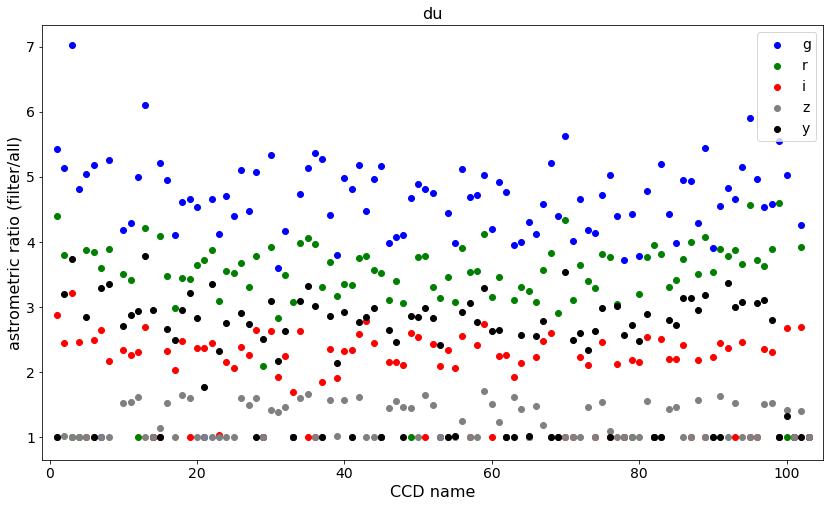

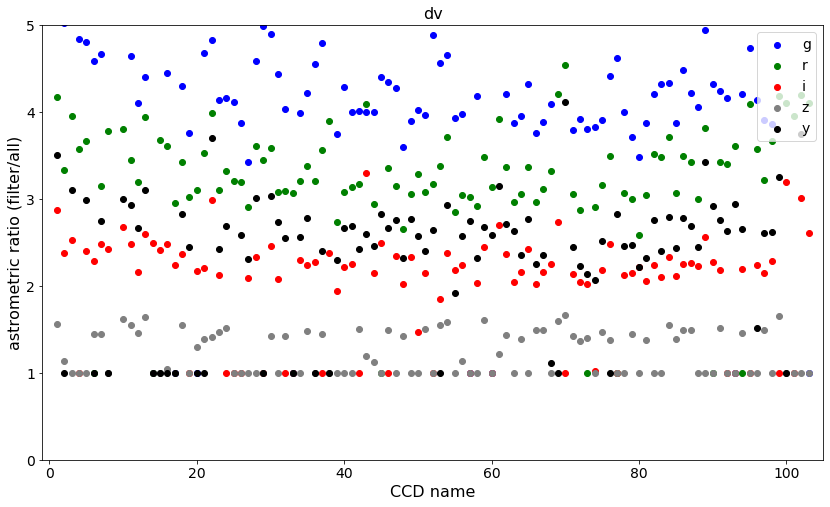

In [69]:
plt.figure(figsize=(14,8))
for filt, col in zip(['g','r','i','z','y'], ['b','g','r','grey', 'k']):
    print(filt, col)
    plt.scatter(ccm.ratio_du[filt]['ccd_name'], ccm.ratio_du[filt]['median_per_CCD'], c=col, label=filt)
    #plt.plot([1,105], [ccm.ratio_du[filt]['median_glob'], ccm.ratio_du[filt]['median_glob']], col, lw=3, label=filt)
plt.xlabel('CCD name', fontsize=16)
plt.ylabel('astrometric ratio (filter/all)',fontsize=16)
#plt.ylabel('astrometric ratio (all/filter)',fontsize=16)
plt.legend(fontsize=14, loc=1)
plt.title('du', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-1, 105)
#plt.ylim(0.,5)
#plt.savefig('filter_inv_ratio_treerings_du.png')

plt.figure(figsize=(14,8))
for filt, col in zip(['g','r','i','z','y'], ['b','g','r','grey', 'k']):
    plt.scatter(ccm.ratio_dv[filt]['ccd_name'], ccm.ratio_dv[filt]['median_per_CCD'], c=col, label=filt)
    #plt.plot([1,105], [ccm.ratio_dv[filt]['median_glob'], ccm.ratio_dv[filt]['median_glob']], col, lw=3, label=filt)
plt.xlabel('CCD name', fontsize=16)
plt.ylabel('astrometric ratio (filter/all)',fontsize=16)
#plt.ylabel('astrometric ratio (all/filter)',fontsize=16)
plt.legend(fontsize=14, loc=1)
plt.title('dv', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-1, 105)
plt.ylim(0.,5)
#plt.ylim(0.75,1.25)
#plt.savefig('filter_inv_ratio_treerings_dv.png')